In [1]:
import pickle
import TextEmbedding 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



In [2]:
X_train = pickle.load(open('FinalData\X_train.pkl', 'rb'))
X_test = pickle.load(open('FinalData\X_test.pkl', 'rb'))
y_train = pickle.load(open('FinalData\y_train.pkl', 'rb'))
y_test = pickle.load(open('FinalData\y_test.pkl', 'rb'))

X_train_w2v = pickle.load(open('FinalData\X_train_w2v.pkl', 'rb'))
X_test_w2v = pickle.load(open('FinalData\X_test_w2v.pkl', 'rb'))
y_train_w2v = pickle.load(open('FinalData\y_train_w2v.pkl', 'rb'))
y_test_w2v = pickle.load(open('FinalData\y_test_w2v.pkl', 'rb'))
tfidf_embedding_train, tfidf_embedding_test = TextEmbedding.tfidf(X_train,X_test)
BOW_embedding_train, BOW_embedding_test = TextEmbedding.BagOfWord(X_train,X_test)
w2v_embedding_train, w2v_embedding_test = TextEmbedding.Word2Vector(X_train,X_test)

In [3]:
list_topic ={
    "thoi-su": 0,
    "kinh-doanh": 1,
    "khoa-hoc": 2,
    "giai-tri": 3,
    "the-thao": 4,
    "phap-luat": 5, 
    "giao-duc": 6,
    "suc-khoe": 7,
    "doi-song": 8,
    "du-lich":  9
}
for i in range (len(y_train)):
    for x, y in list_topic.items():
        if y_train[i] == x:
            y_train[i] = y 
for i in range (len(y_test)):
    for x, y in list_topic.items():
        if y_test[i] == x:
            y_test[i] = y

In [4]:
def KNN(X_train, y_train, X_test, y_test, K, metrics):
    neigh = KNeighborsClassifier(n_neighbors=K, metric = metrics)
    neigh.fit(X_train, y_train)
    test_predictions = neigh.predict(X_test)
    f1 = f1_score(y_test, test_predictions, average='macro')
    recall = recall_score(y_test, test_predictions, average='macro')
    accuracy = accuracy_score(y_test, test_predictions)
    return accuracy, recall, f1

GET BEST SET OF PARAMETERS (USING BOW)

[0.7614503816793893, 0.7614503816793893, 0.6454198473282443]
[0.7577328881209755, 0.7577328881209755, 0.6442960906192151]
[0.7631110542516949, 0.7631110542516949, 0.6427179783942336]


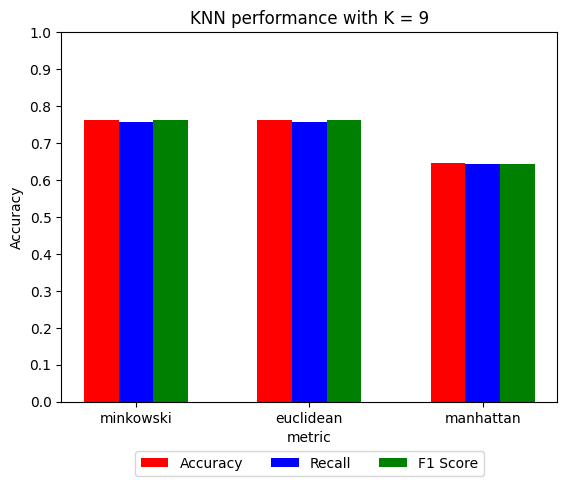

In [14]:
values = ['minkowski','euclidean','manhattan']  
accuracy_values = []
recall_values = []
f1_values = []

for value in values:
    accuracy, recall, f1 = KNN(BOW_embedding_train, y_train, BOW_embedding_test, y_test, 9, value)
    accuracy_values.append(accuracy)
    recall_values.append(recall)
    f1_values.append(f1)


bar_width = 0.2
print(accuracy_values)
print(recall_values)
print(f1_values)

bar_positions = np.arange(len(values))

plt.bar(bar_positions, accuracy_values, width=bar_width, color='red', label='Accuracy')
plt.bar(bar_positions + bar_width, recall_values, width=bar_width, color='blue', label='Recall')
plt.bar(bar_positions + 2*bar_width, f1_values, width=bar_width, color='green', label='F1 Score')

plt.xlabel('metric')
plt.ylabel('Accuracy')
plt.title('KNN performance with K = 9')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=3)

plt.xticks(bar_positions + bar_width, values)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()



In [15]:
def plot_grid_search(param, list_params, result):
    values = [params[param] for params in list_params]

    accuracy_values = result

    bar_width = 0.2
    

    bar_positions = np.arange(len(values))

    plt.bar(bar_positions, accuracy_values, width=bar_width, color='red', label='Accuracy')

    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN Performance Accuracy with metric = minkowski')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=3)

    plt.xticks(bar_positions, values)
    plt.yticks(np.arange(0, 1.1, 0.1))

    plt.show()

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters:  {'n_neighbors': 5}
Best score:  0.7384787569869274


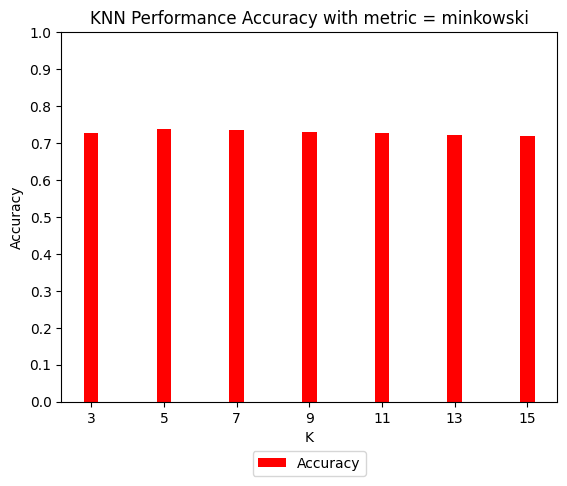

In [16]:
def GridSearch_KNN():
    grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15]}
            #    'metric' : ['minkowski','euclidean','manhattan']}
    
    gs = GridSearchCV(KNeighborsClassifier(metric = 'minkowski'), grid_params, verbose = 1, cv=5, n_jobs = -1)
    grid_search = gs.fit(BOW_embedding_train, y_train)
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    plot_grid_search('n_neighbors', grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'])
    
GridSearch_KNN()

GET BEST SET OF PARAMETERS (USING TFIDF)

[0.8, 0.8, 0.10190839694656488]
[0.798727122967461, 0.798727122967461, 0.10352368573847293]
[0.7973249391624374, 0.7973249391624374, 0.025537693119248268]


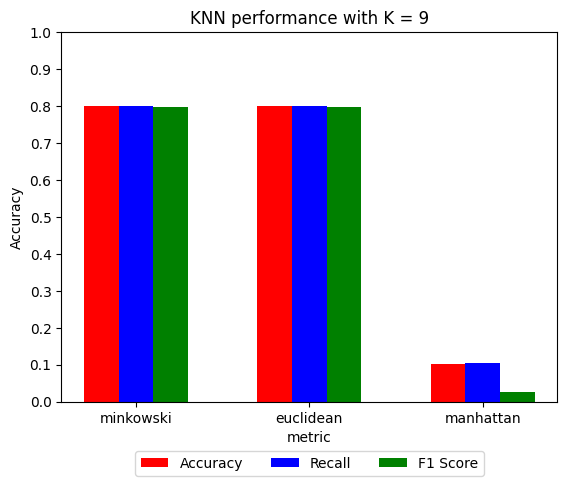

In [17]:
values = ['minkowski','euclidean','manhattan']  
accuracy_values = []
recall_values = []
f1_values = []

for value in values:
    accuracy, recall, f1 = KNN(tfidf_embedding_train, y_train, tfidf_embedding_test, y_test, 9, value)
    accuracy_values.append(accuracy)
    recall_values.append(recall)
    f1_values.append(f1)


bar_width = 0.2
print(accuracy_values)
print(recall_values)
print(f1_values)

bar_positions = np.arange(len(values))

plt.bar(bar_positions, accuracy_values, width=bar_width, color='red', label='Accuracy')
plt.bar(bar_positions + bar_width, recall_values, width=bar_width, color='blue', label='Recall')
plt.bar(bar_positions + 2*bar_width, f1_values, width=bar_width, color='green', label='F1 Score')

plt.xlabel('metric')
plt.ylabel('Accuracy')
plt.title('KNN performance with K = 9')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=3)

plt.xticks(bar_positions + bar_width, values)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()


In [18]:
def plot_grid_search(param, list_params, result):
    values = [params[param] for params in list_params]

    accuracy_values = result

    bar_width = 0.2
    

    bar_positions = np.arange(len(values))

    plt.bar(bar_positions, accuracy_values, width=bar_width, color='red', label='Accuracy')

    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN Performance Accuracy with metric = minkowski')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=3)

    plt.xticks(bar_positions, values)
    plt.yticks(np.arange(0, 1.1, 0.1))

    plt.show()

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters:  {'n_neighbors': 15}
Best score:  0.8147100840131973


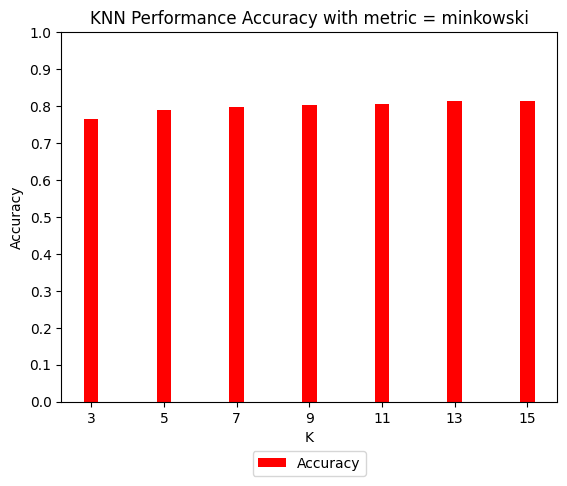

In [19]:
def GridSearch_KNN():
    grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15]}
            #    'metric' : ['minkowski','euclidean','manhattan']}
    
    gs = GridSearchCV(KNeighborsClassifier(metric = 'minkowski'), grid_params, verbose = 1, cv=5, n_jobs = -1)
    grid_search = gs.fit(tfidf_embedding_train, y_train)
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    plot_grid_search('n_neighbors', grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'])
    
GridSearch_KNN()

GET BEST SET OF PARAMETERS (USING WORD2VEC)

[0.8625954198473282, 0.8625954198473282, 0.8625954198473282]
[0.8608013568720615, 0.8608013568720615, 0.8608431228833627]
[0.8605113315807562, 0.8605113315807562, 0.8606704791100703]


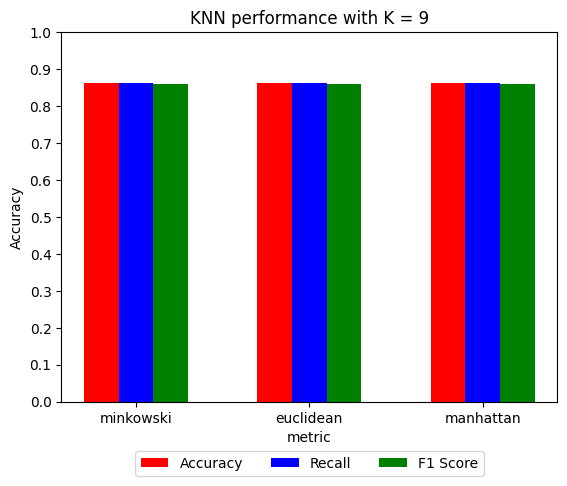

In [20]:
values = ['minkowski','euclidean','manhattan']  
accuracy_values = []
recall_values = []
f1_values = []

for value in values:
    accuracy, recall, f1 = KNN(w2v_embedding_train, y_train, w2v_embedding_test, y_test, 9, value)
    accuracy_values.append(accuracy)
    recall_values.append(recall)
    f1_values.append(f1)


bar_width = 0.2
print(accuracy_values)
print(recall_values)
print(f1_values)

bar_positions = np.arange(len(values))

plt.bar(bar_positions, accuracy_values, width=bar_width, color='red', label='Accuracy')
plt.bar(bar_positions + bar_width, recall_values, width=bar_width, color='blue', label='Recall')
plt.bar(bar_positions + 2*bar_width, f1_values, width=bar_width, color='green', label='F1 Score')

plt.xlabel('metric')
plt.ylabel('Accuracy')
plt.title('KNN performance with K = 9')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=3)

plt.xticks(bar_positions + bar_width, values)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()


In [21]:
def plot_grid_search(param, list_params, result):
    values = [params[param] for params in list_params]

    accuracy_values = result

    bar_width = 0.2
    

    bar_positions = np.arange(len(values))

    plt.bar(bar_positions, accuracy_values, width=bar_width, color='red', label='Accuracy')

    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN Performance Accuracy with metric = minkowski')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.22), ncol=3)

    plt.xticks(bar_positions, values)
    plt.yticks(np.arange(0, 1.1, 0.1))

    plt.show()

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters:  {'n_neighbors': 11}
Best score:  0.8651039110597131


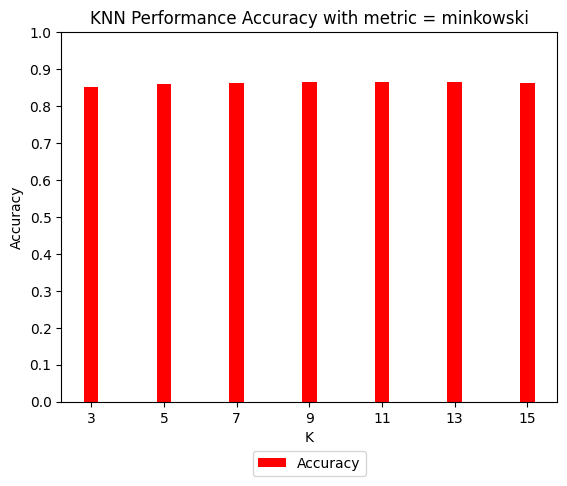

In [22]:
def GridSearch_KNN():
    grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15]}
            #    'metric' : ['minkowski','euclidean','manhattan']}
    
    gs = GridSearchCV(KNeighborsClassifier(metric = 'minkowski'), grid_params, verbose = 1, cv=5, n_jobs = -1)
    grid_search = gs.fit(w2v_embedding_train, y_train)
    print("Best parameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    plot_grid_search('n_neighbors', grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'])
    
GridSearch_KNN()

COMPARE BOW, TFIDF, WORD2VEC WITH BEST OF SET PARAMETERS 